# App Sequences based on apps
In this notebook we 

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("names_with_app_clusters.csv")

In [5]:
data=data.drop(columns=['cluster'])

In [6]:
data["next_app"]=data.groupby(["user_id","session"]).package_name.shift(-1)

In [7]:
data=data.merge(data.groupby(["user_id","session"]).agg({"package_name":"size"}).rename(columns={"package_name":"session_length"}).reset_index(),on=['user_id','session'])

In [8]:
data=data[data.session_length>1]

In [7]:
data.groupby(['package_name']).size()[data.groupby('package_name').size().max()==data.groupby('package_name').size()]

package_name
com.facebook.katana    26575175
dtype: int64

In [7]:
sessions_start_facebook=data.set_index(["user_id","session"]).loc[data[(data.package_name=='com.facebook.katana')&(data.session!=data.groupby(["user_id"]).session.shift(1))].set_index(["user_id","session"]).index]

In [3]:
sessions_start_facebook=pd.read_csv("sessions_start_facebook.csv")

In [3]:
sessions_start_facebook

,user_id,session,package_name,next_app,session_length
0,0,0,com.facebook.katana,com.android.chrome,7
1,0,0,com.android.chrome,com.google.android.apps.photos,7
2,0,0,com.google.android.apps.photos,com.facebook.katana,7
3,0,0,com.facebook.katana,com.whatsapp,7
4,0,0,com.whatsapp,com.google.android.youtube,7
...,...,...,...,...,...
26754848,9999,5641,com.whatsapp,NaN,4
26754849,9999,5642,com.facebook.katana,com.snapchat.android,4
26754850,9999,5642,com.snapchat.android,com.instagram.android,4
26754851,9999,5642,com.instagram.android,com.facebook.katana,4


Now that we have the sessions that begin with the most frequent app (Facebook), we can take a look at which apps come next.

In [4]:
sessions_start_facebook["position in sequence"]=1

In [12]:
sessions_start_facebook["position in sequence"]=sessions_start_facebook.groupby(['user_id','session'])["position in sequence"].cumsum()

In [16]:
sessions_start_facebook.to_csv("sessions_start_facebook.csv")

sessions_start_facebook.groupby(["position in sequence"]).package_name.nunique()

In [4]:
sessions_start_facebook=sessions_start_facebook.drop(columns=['Unnamed: 0'])

In [5]:
sessions_start_facebook[sessions_start_facebook["position in sequence"]==312]

,user_id,session,package_name,next_app,session_length,position in sequence
3378779,1274,4401,com.whatsapp,NaN,312,312


Before we start to look closer at the sequences we take a look at how the sessions are distributed. Below we can see that while there are more sessions of a shorter lengthh, there are still over hudred of the longest one, indicating we have enough information to look at even the longest ones.

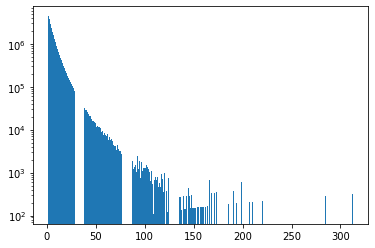

In [13]:
plt.bar(sessions_start_facebook.groupby('session_length').package_name.size().index,sessions_start_facebook.groupby('session_length').package_name.size().values)
plt.yscale('log')
plt.show()

Below it can be observed that for the longest sessions, even there serveral of them, they are all for the samme user.

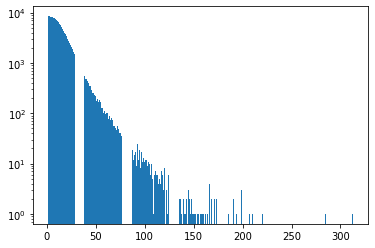

In [18]:
plt.bar(sessions_start_facebook.groupby('session_length').user_id.nunique().index,sessions_start_facebook.groupby('session_length').user_id.nunique().values)
plt.yscale('log')
plt.show()

In [29]:
print("number of different apps in second position:",sessions_start_facebook[sessions_start_facebook['position in sequence']==2].package_name.nunique())

number of different apps in second position: 16860


In [28]:
(sessions_start_facebook[sessions_start_facebook['position in sequence']==2].groupby(['package_name']).session.size()/sessions_start_facebook[sessions_start_facebook['position in sequence']==2].shape[0]*100).sort_values(ascending=False).cumsum().head(20)

package_name
com.facebook.orca                           12.465395
com.whatsapp                                23.037991
com.android.chrome                          31.903474
com.google.android.googlequicksearchbox     39.226893
com.sonyericsson.conversations              45.698446
com.instagram.android                       51.401126
com.snapchat.android                        54.910879
com.sonymobile.email                        58.123037
com.google.android.gm                       61.045534
com.sonyericsson.album                      63.592978
com.twitter.android                         65.792638
com.google.android.youtube                  67.719423
com.google.android.apps.maps                69.169745
com.android.incallui                        70.351192
com.microsoft.office.outlook                71.491801
com.yahoo.mobile.client.android.mail        72.528801
com.sonyericsson.android.socialphonebook    73.476892
com.ebay.mobile                             74.348975
bbc.mobile.news

So while there is more than 16000 different apps that are second in the secuences more than 50% of the cases can be described with the six apps.

In [30]:
print("number of different apps in thrid position:",sessions_start_facebook[sessions_start_facebook['position in sequence']==3].package_name.nunique())

(sessions_start_facebook[sessions_start_facebook['position in sequence']==3].groupby(['package_name']).session.size()/sessions_start_facebook[sessions_start_facebook['position in sequence']==3].shape[0]*100).sort_values(ascending=False).cumsum().head(20)

number of different apps in thrid position: 14662


package_name
com.facebook.katana                         29.057969
com.android.chrome                          40.118423
com.whatsapp                                45.245488
com.google.android.googlequicksearchbox     49.641369
com.facebook.orca                           53.949484
com.instagram.android                       57.996972
com.sonyericsson.conversations              61.322363
com.snapchat.android                        63.807984
com.google.android.gm                       65.951897
com.sonymobile.email                        68.060223
com.sonyericsson.album                      69.777514
com.android.incallui                        71.427567
com.google.android.youtube                  73.029828
com.twitter.android                         74.591932
com.google.android.apps.maps                75.892509
com.sonyericsson.android.socialphonebook    76.948574
com.microsoft.office.outlook                77.833441
com.ebay.mobile                             78.518576
com.yahoo.mobil

Again we see that there is some of the same patterns that next to something there is something else.

In [32]:
sessions_start_facebook.groupby('position in sequence').package_name.nunique().sort_values(ascending=False)

position in sequence
2      16860
3      14662
4      13208
5      11853
6      10342
       ...  
288        1
287        1
286        1
256        1
312        1
Name: package_name, Length: 312, dtype: int64

# Whatsapp

In [11]:
data.groupby(['package_name']).size().nlargest(10)

package_name
com.facebook.katana                        26575175
com.whatsapp                               20477938
com.android.chrome                         17908653
com.google.android.googlequicksearchbox    11580748
com.sonyericsson.conversations             10866701
com.facebook.orca                           9572454
com.instagram.android                       7612178
com.snapchat.android                        6190071
com.google.android.gm                       5042581
com.sonymobile.email                        4590381
dtype: int64

In [17]:
data.groupby(['package_name']).size()[data.groupby(['package_name']).size().nlargest(10)[1]==data.groupby(['package_name']).size()]

package_name
com.whatsapp    20477938
dtype: int64

In [18]:
sessions_start_whatsapp=data.set_index(["user_id","session"]).loc[data[(data.package_name=='com.whatsapp')&(data.session!=data.groupby(["user_id"]).session.shift(1))].set_index(["user_id","session"]).index]

In [21]:
sessions_start_whatsapp['position in sequence']=1

In [25]:
sessions_start_whatsapp["position in sequence"]=sessions_start_whatsapp.groupby(['user_id','session'])["position in sequence"].cumsum()

In [26]:
sessions_start_whatsapp

package_name               next_app  session_length  \
user_id session                                                                 
0       2                 com.whatsapp    com.facebook.katana               6   
        2          com.facebook.katana           com.whatsapp               6   
        2                 com.whatsapp  bg.abv.andro.emailapp               6   
        2        bg.abv.andro.emailapp     com.android.chrome               6   
        2           com.android.chrome           com.whatsapp               6   
...                                ...                    ...             ...   
9999    5640              com.whatsapp     bbc.mobile.weather               5   
        5640        bbc.mobile.weather    com.facebook.katana               5   
        5640       com.facebook.katana           com.whatsapp               5   
        5640              com.whatsapp    com.facebook.katana               5   
        5640       com.facebook.katana                    NaN               5   

                 position in sequence  
user_id session                        
0       2                           1  
        2                           2  
        2                           3  
        2                           4  
        2                           5  
...                               ...  
9999    5640                        1  
        5640                        2  
        5640                        3  
        5640                        4  
        5640                        5  

[28022810 rows x 4 columns]

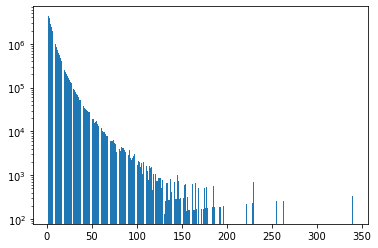

In [30]:
plt.bar(sessions_start_whatsapp.groupby('session_length').package_name.size().index,sessions_start_whatsapp.groupby('session_length').package_name.size().values)
plt.yscale('log')
plt.show()

In [34]:
sessions_start_whatsapp=sessions_start_whatsapp.reset_index()

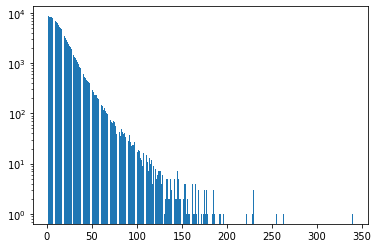

In [35]:
plt.bar(sessions_start_whatsapp.groupby('session_length').user_id.nunique().index,sessions_start_whatsapp.groupby('session_length').user_id.nunique().values)
plt.yscale('log')
plt.show()

The over all patterns are the same as what we observed for facebook

In [39]:
print("number of different apps in second position:",sessions_start_whatsapp[sessions_start_whatsapp['position in sequence']==2].package_name.nunique())
(sessions_start_whatsapp[sessions_start_whatsapp['position in sequence']==2].groupby(['package_name']).session.size()/sessions_start_whatsapp[sessions_start_whatsapp['position in sequence']==2].shape[0]*100).sort_values(ascending=False).cumsum().head(20)

number of different apps in second position: 15286


package_name
com.facebook.katana                         20.692215
com.android.chrome                          27.704909
com.google.android.googlequicksearchbox     34.038960
com.sonyericsson.conversations              40.260709
com.instagram.android                       45.871720
com.snapchat.android                        49.588500
com.facebook.orca                           53.270181
com.google.android.gm                       56.852987
com.sonymobile.email                        60.281353
com.sonyericsson.album                      63.584743
com.google.android.apps.maps                65.567215
com.twitter.android                         67.309649
com.sonyericsson.android.socialphonebook    68.976836
com.google.android.youtube                  70.641365
com.android.incallui                        72.178174
com.microsoft.office.outlook                73.562299
com.spotify.music                           74.620906
com.yahoo.mobile.client.android.mail        75.547045
bbc.mobile.news

In [40]:
print("number of different apps in thrid position:",sessions_start_facebook[sessions_start_facebook['position in sequence']==3].package_name.nunique())

(sessions_start_whatsapp[sessions_start_whatsapp['position in sequence']==3].groupby(['package_name']).session.size()/sessions_start_whatsapp[sessions_start_whatsapp['position in sequence']==3].shape[0]*100).sort_values(ascending=False).cumsum().head(20)

number of different apps in thrid position: 14662


package_name
com.whatsapp                                31.654564
com.facebook.katana                         41.638892
com.android.chrome                          50.192503
com.google.android.googlequicksearchbox     54.407847
com.instagram.android                       58.128541
com.facebook.orca                           61.116611
com.sonyericsson.conversations              63.852626
com.android.incallui                        66.142629
com.google.android.gm                       68.327846
com.snapchat.android                        70.383073
com.sonymobile.email                        72.310337
com.sonyericsson.album                      74.002617
com.google.android.apps.maps                75.498601
com.twitter.android                         76.902061
com.sonyericsson.android.socialphonebook    78.263664
com.google.android.youtube                  79.598532
com.microsoft.office.outlook                80.482684
com.spotify.music                           81.108286
com.yahoo.mobil

In the same way as we saw for Facebook, there is a lot of different apps occuring at the third position, but the user is most likely to return to the same app again.

# Chrome

In [41]:
data.groupby(['package_name']).size()[data.groupby(['package_name']).size().nlargest(10)[2]==data.groupby(['package_name']).size()]

package_name
com.android.chrome    17908653
dtype: int64

In [42]:
sessions_start_chrome=data.set_index(["user_id","session"]).loc[data[(data.package_name=='com.android.chrome')&(data.session!=data.groupby(["user_id"]).session.shift(1))].set_index(["user_id","session"]).index]

In [43]:
sessions_start_chrome['position in sequence']=1
sessions_start_chrome["position in sequence"]=sessions_start_chrome.groupby(['user_id','session'])["position in sequence"].cumsum()

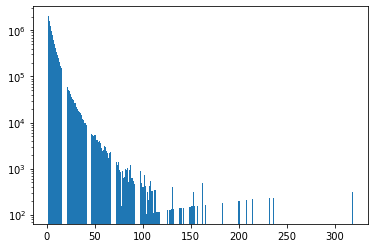

In [44]:
plt.bar(sessions_start_chrome.groupby('session_length').package_name.size().index,sessions_start_chrome.groupby('session_length').package_name.size().values)
plt.yscale('log')
plt.show()

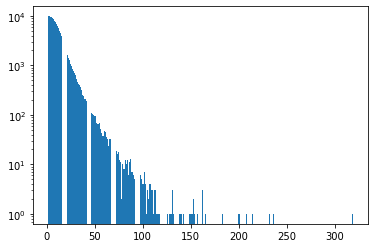

In [45]:
sessions_start_chrome=sessions_start_chrome.reset_index()

plt.bar(sessions_start_chrome.groupby('session_length').user_id.nunique().index,sessions_start_chrome.groupby('session_length').user_id.nunique().values)
plt.yscale('log')
plt.show()

The over all patterns are again the same as what we observed for the two previous apps..

In [48]:
print("number of different apps in second position:",sessions_start_whatsapp[sessions_start_whatsapp['position in sequence']==2].package_name.nunique())
(sessions_start_chrome[sessions_start_chrome['position in sequence']==2].groupby(['package_name']).session.size()/sessions_start_chrome[sessions_start_chrome['position in sequence']==2].shape[0]*100).sort_values(ascending=False).cumsum().head(20)

number of different apps in second position: 15286


package_name
com.facebook.katana                         13.904273
com.whatsapp                                24.728333
com.google.android.googlequicksearchbox     34.102786
com.sonyericsson.conversations              39.873934
com.facebook.orca                           43.963234
com.google.android.gm                       47.710872
com.google.android.youtube                  51.224592
com.google.android.apps.maps                54.522981
com.sonymobile.email                        57.577438
com.instagram.android                       60.332239
com.twitter.android                         62.463999
com.sonyericsson.album                      64.436151
com.snapchat.android                        66.155798
com.microsoft.office.outlook                67.437496
com.sonyericsson.android.socialphonebook    68.515320
com.google.android.apps.docs                69.592052
com.android.incallui                        70.652886
com.ebay.mobile                             71.637111
com.yahoo.mobil

In [49]:
print("number of different apps in thrid position:",sessions_start_chrome[sessions_start_chrome['position in sequence']==3].package_name.nunique())
(sessions_start_chrome[sessions_start_chrome['position in sequence']==3].groupby(['package_name']).session.size()/sessions_start_chrome[sessions_start_chrome['position in sequence']==3].shape[0]*100).sort_values(ascending=False).cumsum().head(20)

number of different apps in thrid position: 11490


package_name
com.android.chrome                          28.245418
com.facebook.katana                         38.723039
com.whatsapp                                44.515226
com.google.android.googlequicksearchbox     49.166861
com.facebook.orca                           52.619808
com.sonyericsson.conversations              55.900667
com.instagram.android                       58.795892
com.google.android.gm                       61.393681
com.sonymobile.email                        63.625407
com.google.android.youtube                  65.641847
com.android.incallui                        67.431155
com.google.android.apps.maps                69.182673
com.twitter.android                         70.850367
com.sonyericsson.album                      72.480206
com.snapchat.android                        73.981286
com.sonyericsson.android.socialphonebook    75.065828
com.microsoft.office.outlook                76.021418
com.ebay.mobile                             76.750712
com.yahoo.mobil

Again it can be observed that it is most likly that the third app visited is a return to the start app. This appear to be a potential overall pattern and we there for take a look at the most likly apps to be in the second position for the 50 most frequent ones.

In [51]:
frequent_apps=data.groupby(['package_name']).size().nlargest(50)

In [62]:
df_start_sequence=pd.DataFrame([])
frequent_apps=data.groupby(['package_name']).size().nlargest(50)
for i in range(50):
    app=data.groupby(['package_name']).size()[frequent_apps[i]==data.groupby(['package_name']).size()].index[0]
    df_start_sequence=data.set_index(["user_id","session"]).loc[data[(data.package_name==app)&(data.session!=data.groupby(["user_id"]).session.shift(1))].set_index(["user_id","session"]).index]
    df_start_sequence['position in sequence']=1
    df_start_sequence["position in sequence"]=df_start_sequence.groupby(['user_id','session'])["position in sequence"].cumsum()
    df_start_sequence["start_app"]=app
    df_start_sequences=df_start_sequences.append(df_start_sequence)

In [63]:
df_start_sequences.to_csv("start_sequences_top50.csv")

In [2]:
df_start_sequences=pd.read_csv("start_sequences_top50.csv")

In [37]:
df_probabilities_in_position=df_start_sequences.reset_index().groupby(["start_app","position in sequence","package_name"]).size()
df_probabilities_in_position=df_probabilities_in_position.reset_index().rename(columns={0:"app_count"})
df_probabilities_in_position=df_probabilities_in_position.merge(df_probabilities_in_position.groupby(['start_app','position in sequence']).agg({'app_count':'sum'}).rename({'app_count':'probability'}),on=['start_app','position in sequence'], suffixes=('_individual', '_overall'))
df_probabilities_in_position["probability"]=df_probabilities_in_position["app_count_individual"]/df_probabilities_in_position["app_count_overall"]*100

In [62]:
df_max_probability_in_position=df_probabilities_in_position[df_probabilities_in_position.app_count_individual>1].groupby(['start_app','position in sequence']).agg({'probability':'max'}).reset_index()
df_max_probability_in_position=df_max_probability_in_position.merge(df_probabilities_in_position,on=['start_app','position in sequence','probability'])

In [70]:
(df_max_probability_in_position.groupby(['start_app','position in sequence']).size()!=1).sum()

784

In [77]:
df_max_probability_in_position.groupby(['start_app','position in sequence']).size()[df_max_probability_in_position.groupby(['start_app','position in sequence']).size()!=1].reset_index()['position in sequence'].min()

12

As we can see, there is serveral positions where more than one app has the highest probabillity. However these are the longer apps, and therefore we start by takeing a look at only the first 10 position in a sequence.

In [259]:
first_max_10_positions=df_max_probability_in_position[df_max_probability_in_position['position in sequence']<=10]

In [260]:
first_max_10_positions=first_max_10_positions.merge(df_probabilities_in_position[df_probabilities_in_position['position in sequence']==1][['start_app','app_count_overall']].rename(columns={'app_count_overall':'start_app_count'}),on='start_app')

In [242]:
Max_10_positions=first_max_10_positions.pivot(index='start_app', columns='position in sequence',values=['package_name'])
Max_10_positions.columns=Max_10_positions.columns.droplevel(0)
Max_10_positions.reset_index().merge(first_max_10_positions[['start_app','start_app_count']],on='start_app').sort_values('start_app_count',ascending=False).drop(columns="start_app_count").set_index('start_app').drop_duplicates()

,1,2,3,4,5,6,7,8,9,10
start_app,,,,,,,,,,
com.facebook.katana,com.facebook.katana,com.facebook.orca,com.facebook.katana,com.facebook.katana,com.facebook.katana,com.facebook.katana,com.facebook.katana,com.facebook.katana,com.facebook.katana,com.facebook.katana
com.whatsapp,com.whatsapp,com.facebook.katana,com.whatsapp,com.whatsapp,com.whatsapp,com.whatsapp,com.whatsapp,com.whatsapp,com.whatsapp,com.whatsapp
com.sonyericsson.conversations,com.sonyericsson.conversations,com.facebook.katana,com.sonyericsson.conversations,com.sonyericsson.conversations,com.sonyericsson.conversations,com.sonyericsson.conversations,com.sonyericsson.conversations,com.sonyericsson.conversations,com.sonyericsson.conversations,com.sonyericsson.conversations
com.google.android.googlequicksearchbox,com.google.android.googlequicksearchbox,com.android.chrome,com.google.android.googlequicksearchbox,com.android.chrome,com.google.android.googlequicksearchbox,com.android.chrome,com.google.android.googlequicksearchbox,com.google.android.googlequicksearchbox,com.google.android.googlequicksearchbox,com.google.android.googlequicksearchbox
com.android.chrome,com.android.chrome,com.facebook.katana,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome
com.facebook.orca,com.facebook.orca,com.facebook.katana,com.facebook.orca,com.facebook.katana,com.facebook.orca,com.facebook.katana,com.facebook.orca,com.facebook.orca,com.facebook.orca,com.facebook.orca
com.google.android.gm,com.google.android.gm,com.android.chrome,com.google.android.gm,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome
com.instagram.android,com.instagram.android,com.facebook.katana,com.instagram.android,com.instagram.android,com.instagram.android,com.instagram.android,com.instagram.android,com.instagram.android,com.instagram.android,com.instagram.android
com.sonymobile.email,com.sonymobile.email,com.facebook.katana,com.sonymobile.email,com.facebook.katana,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome,com.android.chrome


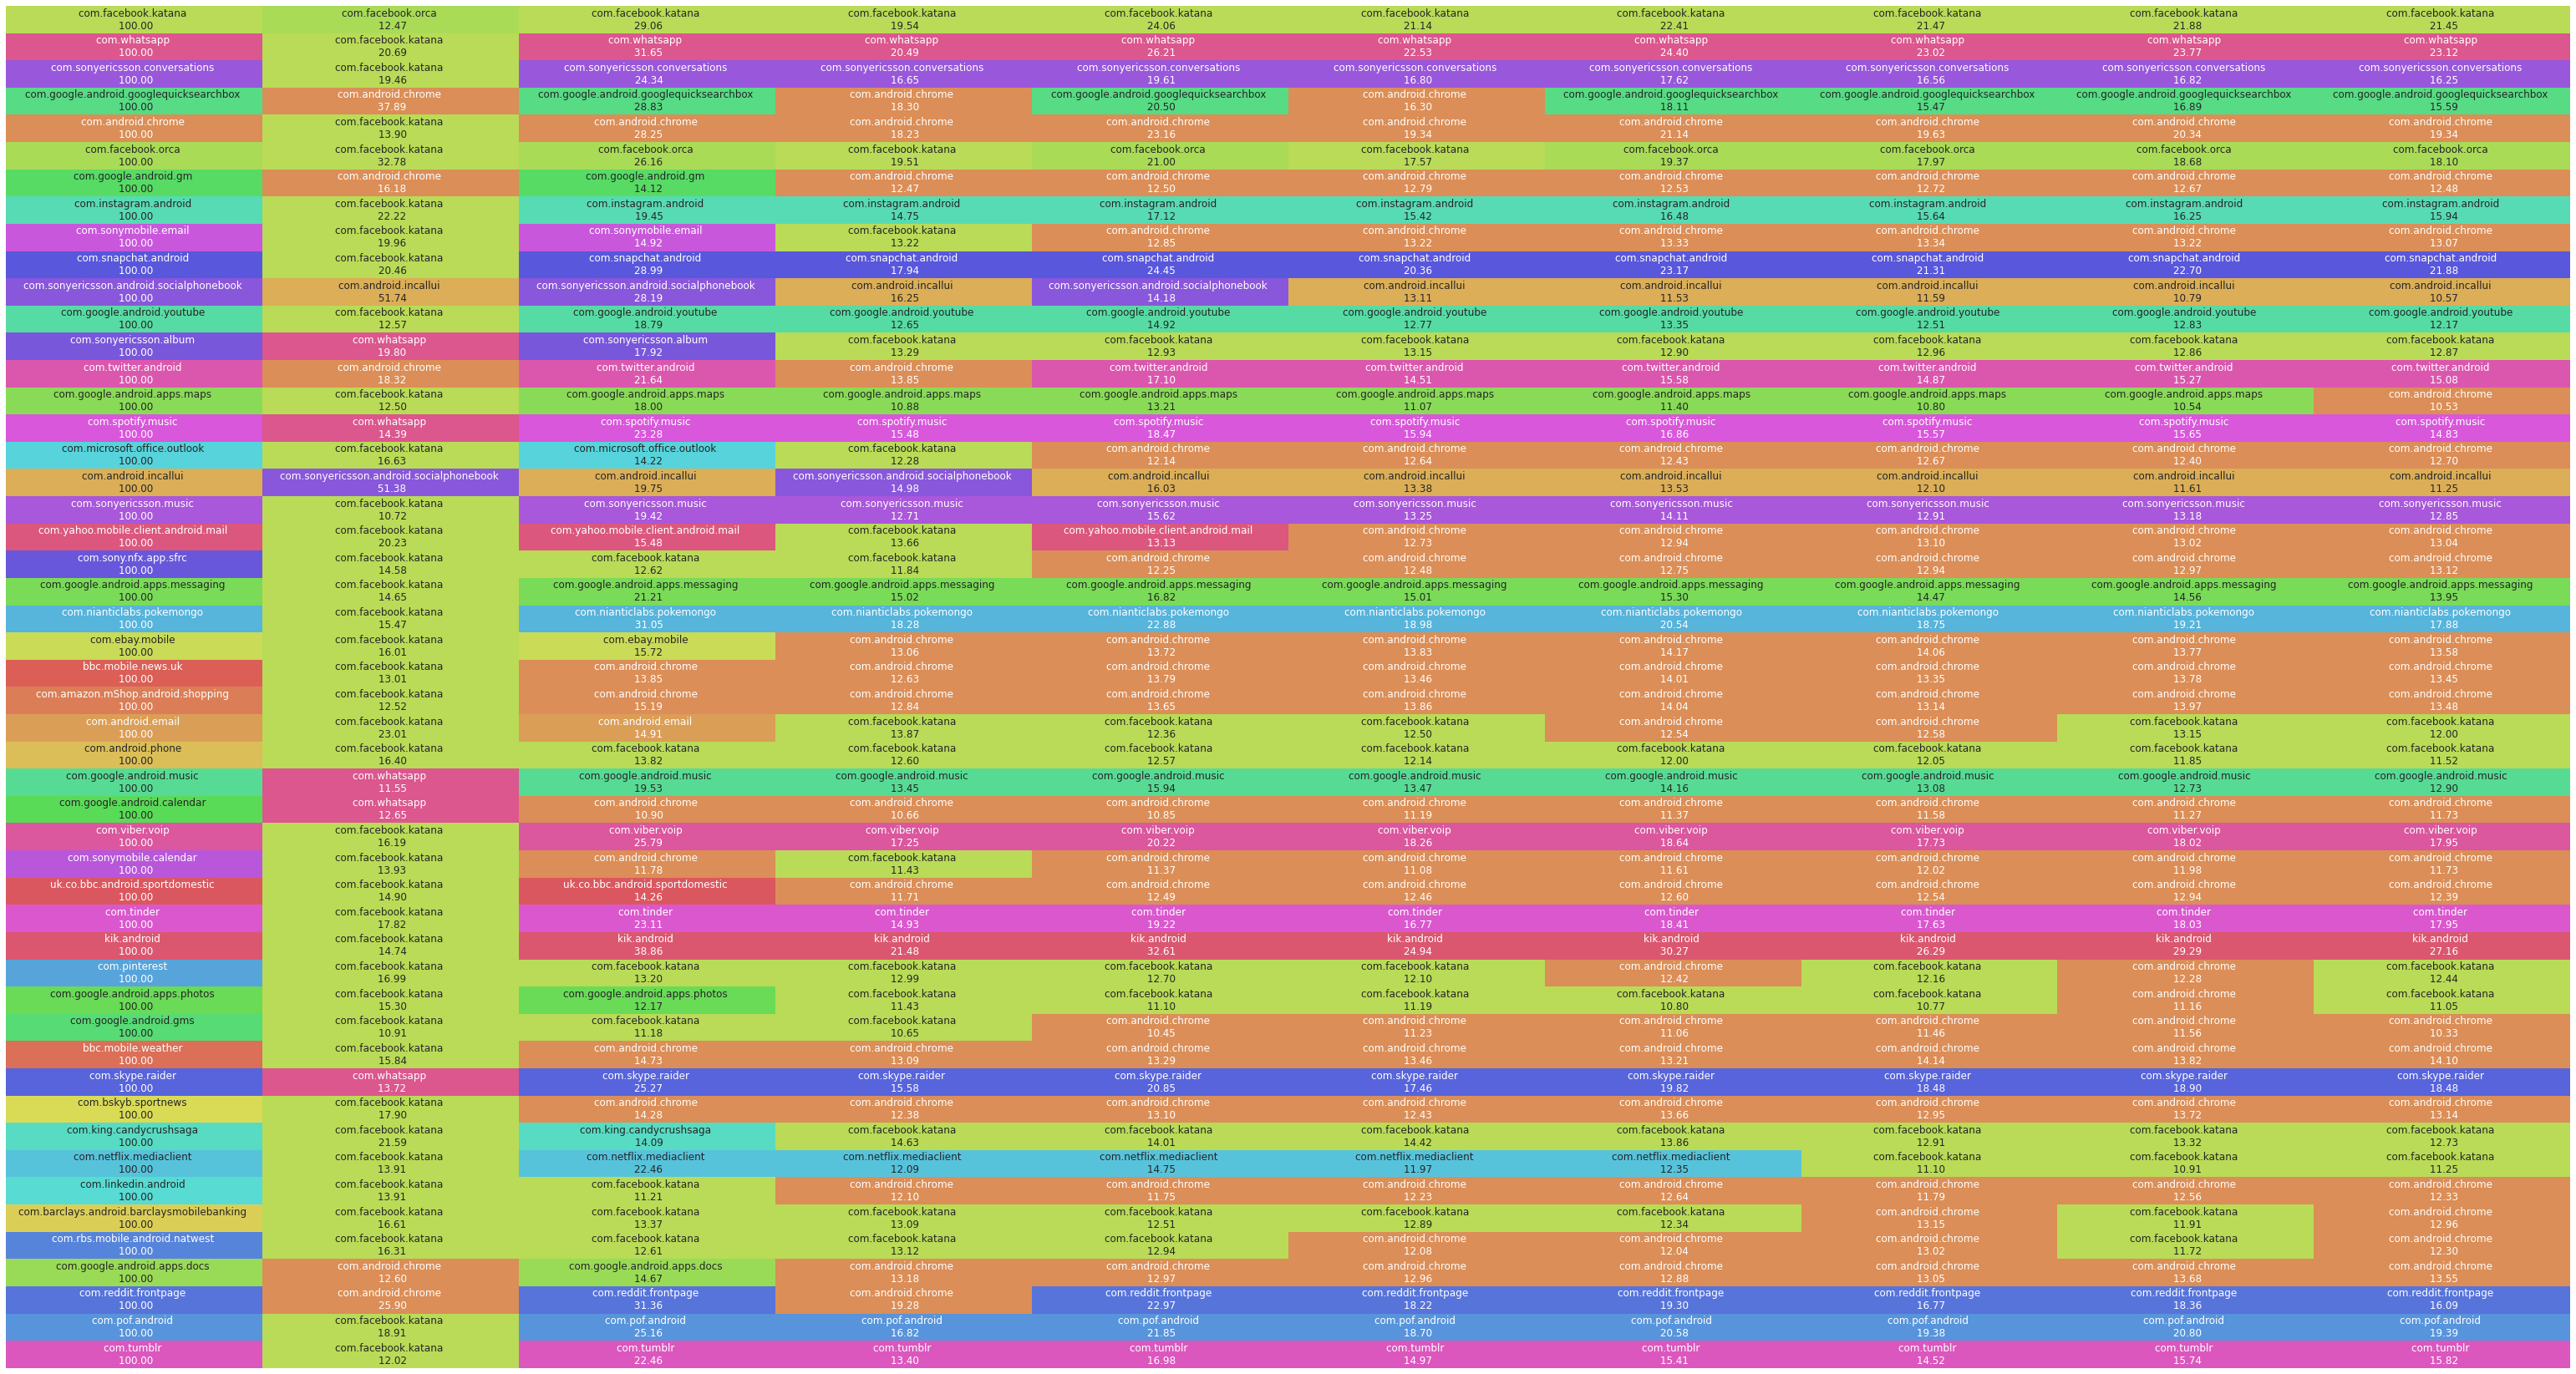

In [270]:
n=len(value_to_int)
cm= sns.color_palette("hls", 50)
Max_10_positions=first_max_10_positions.pivot(index='start_app', columns='position in sequence',values=['package_name'])
Max_10_positions.columns=Max_10_positions.columns.droplevel(0)
Max_10_positions=Max_10_positions.reset_index().merge(first_max_10_positions[['start_app','start_app_count']],on='start_app').sort_values('start_app_count',ascending=False).drop(columns="start_app_count").set_index('start_app').drop_duplicates()
Max_10_positions_prob=first_max_10_positions.pivot(index='start_app', columns='position in sequence',values=['probability'])
Max_10_positions_prob.columns=Max_10_positions_prob.columns.droplevel(0)
Max_10_positions_prob=Max_10_positions_prob.reset_index().merge(first_max_10_positions[['start_app','start_app_count']],on='start_app').sort_values('start_app_count',ascending=False).drop(columns="start_app_count").set_index('start_app').drop_duplicates()
labels=(np.asarray(["{} \n {:.2f}".format(app,prob) for app,prob in zip(Max_10_positions.values.reshape(-1),Max_10_positions_prob.values.reshape(-1))])).reshape(50,10)
fig, ax = plt.subplots(figsize=(55,30))  
ax = sns.heatmap(Max_10_positions.replace(value_to_int), cmap=cm,annot=labels,fmt="",cbar=False,yticklabels=False) 
ax.set(xlabel='')
ax.set(ylabel='')
ax.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=False)
plt.show()

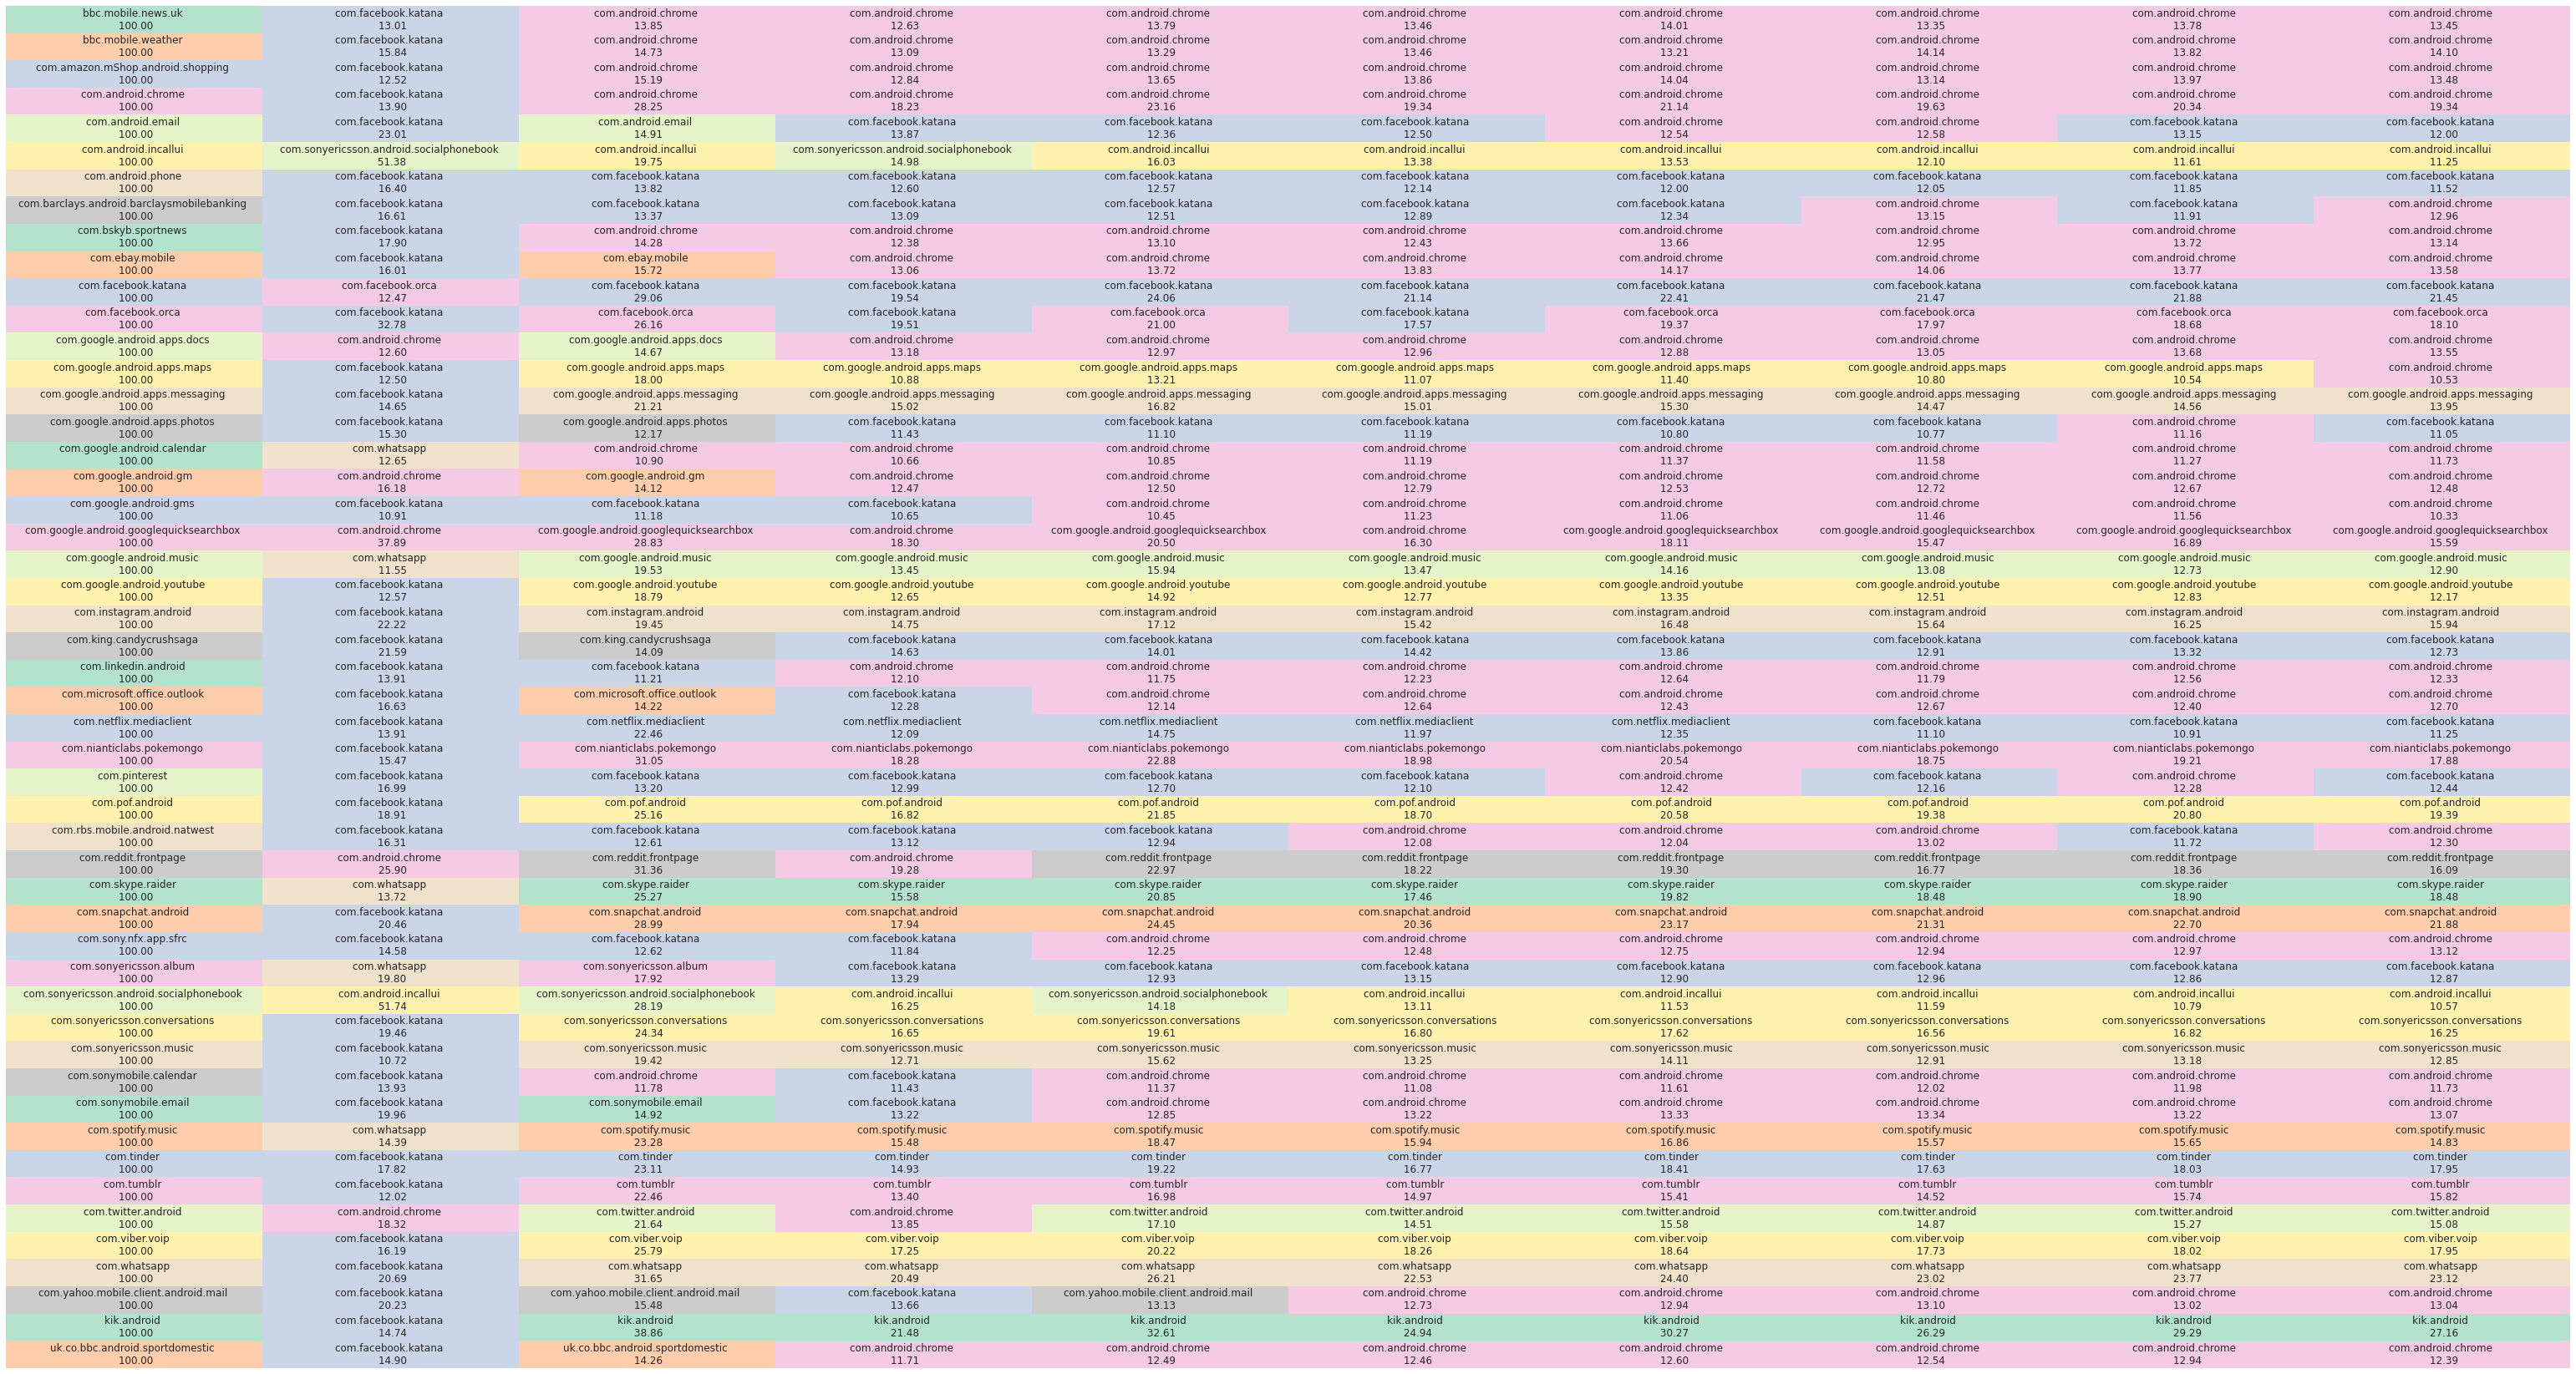

In [262]:
n=len(value_to_int)
cm= sns.color_palette("Pastel2", 50)
labels=(np.asarray(["{} \n {:.2f}".format(app,prob) for app,prob in zip(first_max_10_positions.pivot(index='start_app', columns='position in sequence',values=['package_name']).values.reshape(-1),first_max_10_positions.pivot(index='start_app', columns='position in sequence',values=['probability']).values.reshape(-1))])).reshape(50,10)
fig, ax = plt.subplots(figsize=(55,30))  
ax = sns.heatmap(first_max_10_positions.pivot(index='start_app', columns='position in sequence',values=['package_name']).replace(value_to_int).rename(columns={'package_name-1':'position 0'}), cmap=cm,annot=labels,fmt="",cbar=False,yticklabels=False) 
ax.set(xlabel='')
ax.set(ylabel='')
ax.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=False)
plt.show()